In [ ]:
# Author: Julia Siger
# Index number: 246948
# email adress: 246948@edu.p.lodz.pl
# Major: Computer Science
# Year: 3
# Semester: 5

In [ ]:
# In this project, I aim to build and evaluate machine learning models to predict whether a bank customer will subscribe to 
# a term deposit based on data from direct marketing campaigns. The dataset is sourced from the UCI Machine Learning Repository.

In [38]:
# NEEDED IMPORTS

In [39]:
!pip install ucimlrepo pandas numpy matplotlib seaborn scikit-learn xgboost

In [40]:
from ucimlrepo import fetch_ucirepo  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# UNDERSTANDING THE DATA SET

In [42]:
# loading the Bank Marketing dataset from the UCI Machine Learning Repository 
# to get the data to analyze for my project

bank_marketing = fetch_ucirepo(id=222)


In [43]:
# separating the dataset into features (X) and the target variable (y) 
# to distinguish between input variables and the outcome I am predicting

X = bank_marketing.data.features
y = bank_marketing.data.targets

In [44]:
# printing the first few rows of the feature set and target variable
# to check if the data loaded correctly and to get an initial sense of its structure

print("First 5 rows of feature set (X):")
print(X.head())

print("\nFirst 5 rows of target variable (y):")
print(y.head())

First 5 rows of feature set (X):
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  

First 5 rows of target variable (y):
    y
0  no
1  no
2  n

In [45]:
# understanding the background, to clean up the data

print("\nMetadata:")  
print(bank_marketing.metadata)  


Metadata:
{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to pr

In [46]:
# identifying categorical and numerical variables to finally determining the preprocessing steps needed
print("\nVariable information:")  
print(bank_marketing.variables)  


Variable information:
           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical            

In [47]:
# PREPROCESSING

In [48]:
# identifying categorical columns because I need to encode them into numerical values 
# for machine learning models to process them properly because machine learning models require numerical inputs 
# rather than text-based categories

categorical_cols = X.select_dtypes(include=['object']).columns

In [49]:
# encoding categorical features found in the previous step using LabelEncoder 

le = LabelEncoder()
for col in categorical_cols:
    X.loc[:, col] = le.fit_transform(X[col])

In [50]:
# similarly I encode the target variable into numerical format 
# because classification algorithms need numerical labels instead of string values

y = le.fit_transform(y.to_numpy().ravel())

In [51]:
# standarizing the features using StandardScaler 
# as it ensures that all variables have the same scale, 
# improving model performance and preventing certain features from dominating due to larger numerical ranges

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
# converting the scaled features back into a DataFrame because I want to retain the column names and make further analysis easier.

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [53]:
# splitting the dataset into training and testing sets 
# because I need separate data for model training and evaluation 
# to check how well my model generalizes to unseen data. 
# I use stratify=y to ensure the class distribution remains balanced.

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

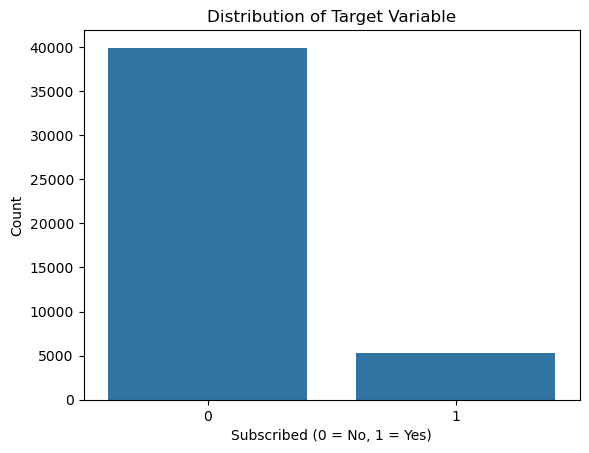

In [54]:
# plotting the distribution of the target variable because I want to check for class imbalance, which could impact model performance

sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.xlabel('Subscribed (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [55]:
# the data set is inbalances, there are significantly more "No" than "Yes" cases, 
# the model can be biased toward predicting "No" more often, reducing its ability to correctly identify "Yes" cases,
# it can also try to predict "No" more often than "Yes"

# I could try undersampling, but I chose not to apply undersampling 
# because it can result in the loss of information from the majority class, 
# potentially reducing the model's ability to capture the full diversity of 'No' cases.

# Due to this decision my model will probably come out better at detecting "no" than "yes" cases.

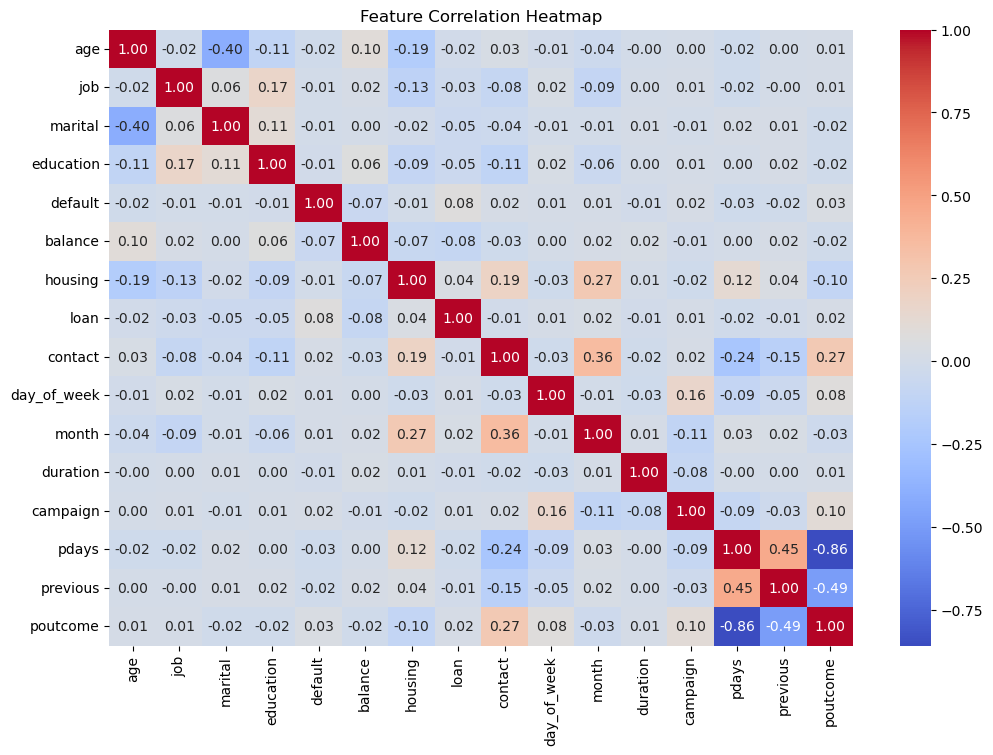

In [56]:
# Creating a correlation heatmap because I want to understand how features relate to each other 
# and detect potential multicollinearity, which could affect model performance.

plt.figure(figsize=(12,8))
sns.heatmap(pd.DataFrame(X_scaled).corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [57]:
# Observations from the feature correlation map:
# - Most features show weak correlations (close to 0), meaning they are relatively independent of each other. 
#   This suggests that no single feature dominates in determining the outcome, and the model will likely rely on multiple variables.

# - previous and pdays have a high positive correlation (0.45)
#   This makes sense because "previous" represents the number of times a client was contacted in past campaigns, 
#   and "pdays" represents the number of days since the last contact.
#   If two features are highly correlated, one might be redundant and could be removed to reduce multicollinearity.

# - poutcome (previous campaign outcome) and pdays have a strong negative correlation (-0.86)
#   This suggests that when a client had been contacted recently, the previous campaign outcome was likely successful.

# - housing (whether a person has a housing loan) and contact method seem to have some correlation with month
#   This might indicate that different types of customers are contacted in different months, which could be a factor worth exploring.

In [58]:
# Function to calculate VIF - calculates the Variance Inflation Factor (VIF) for each feature to detect multicollinearity
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# calculating VIF before dropping features
vif_before = calculate_vif(X_scaled)
print("VIF before removing correlated features:\n", vif_before)


VIF before removing correlated features:
         Feature       VIF
0           age  1.279310
1           job  1.049332
2       marital  1.218279
3     education  1.066491
4       default  1.011706
5       balance  1.032463
6       housing  1.190106
7          loan  1.020907
8       contact  1.319594
9   day_of_week  1.039638
10        month  1.250628
11     duration  1.009757
12     campaign  1.057919
13        pdays  3.868474
14     previous  1.325780
15     poutcome  4.081133


In [59]:
# dropping pdays because it has a strong negative correlation with poutcome (-0.86) and a high correlation with previous (0.45), 
# making it redundant.
X_scaled = X_scaled.drop(columns=['pdays'])

# calculating VIF after dropping 'pdays' - to confirm the reduction of multicollinearity
vif_after = calculate_vif(X_scaled)
print("VIF after removing 'pdays':\n", vif_after)

VIF after removing 'pdays':
         Feature       VIF
0           age  1.278910
1           job  1.048948
2       marital  1.218269
3     education  1.065637
4       default  1.011706
5       balance  1.031943
6       housing  1.184198
7          loan  1.020225
8       contact  1.317216
9   day_of_week  1.037930
10        month  1.250619
11     duration  1.009603
12     campaign  1.057899
13     previous  1.317832
14     poutcome  1.453720


In [60]:
# splitting the dataset again after dropping the feature to ensure the training and testing sets are updated

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [61]:
# ANALYSIS


In [62]:
# I chose 4 classifiers
# c1 - random forest
# c2 - logistic regression
# c3 - decision tree
# c4 - xgb

# I chose Random Forest, Logistic Regression, Decision Tree, and XGBoost based on the dataset's characteristics.
# The bank marketing data contains both numerical and categorical variables with potential non-linear relationships.
# The target variable is imbalanced, with more "no" responses than "yes," making robustness important.
# Logistic Regression is chosen as a baseline due to its simplicity and interpretability for linear relationships.
# Decision Trees are included because they handle mixed data types well and generate interpretable decision rules.
# Random Forest enhances robustness by reducing overfitting through ensemble learning, making it more reliable.
# XGBoost is selected for its efficiency, high accuracy, and ability to handle imbalanced and complex data.
# This combination ensures diverse model comparisons, balancing accuracy, robustness, and interpretability.

In [63]:
# 1. Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

Logistic Regression Accuracy: 0.8894


In [64]:
# 2. Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

Decision Tree Accuracy: 0.8764


In [65]:
# 3. Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.9025


In [66]:
# 4. XGB Classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")

XGBoost Accuracy: 0.9029


In [67]:
classifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [accuracy_log_reg, accuracy_dt, accuracy_rf, accuracy_xgb]

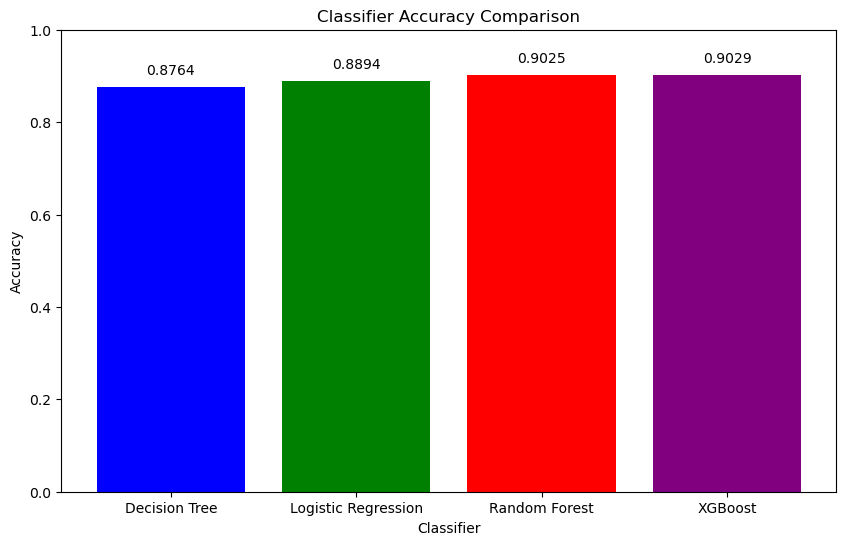

In [68]:
sorted_indices = np.argsort(accuracies)
sorted_classifiers = np.array(classifiers)[sorted_indices]
sorted_accuracies = np.array(accuracies)[sorted_indices]

plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_classifiers, sorted_accuracies, color=['blue', 'green', 'red', 'purple'])

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (accuracy)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{yval:.4f}", ha='center', va='bottom')

plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.ylim(0, 1)
plt.show()


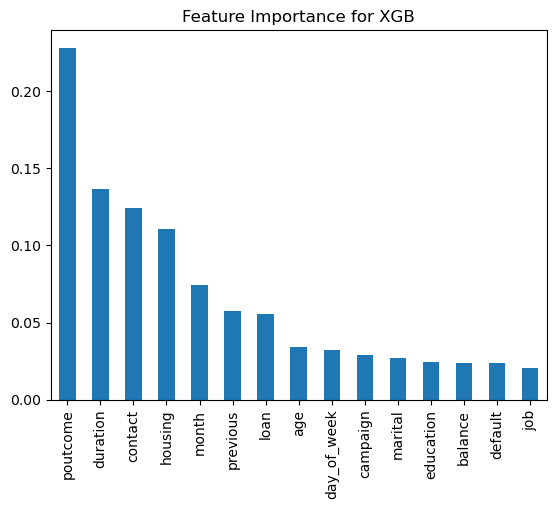

In [69]:
importance = pd.Series(xgb_classifier.feature_importances_, index=X_scaled.columns)
importance.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance for XGB')
plt.show()


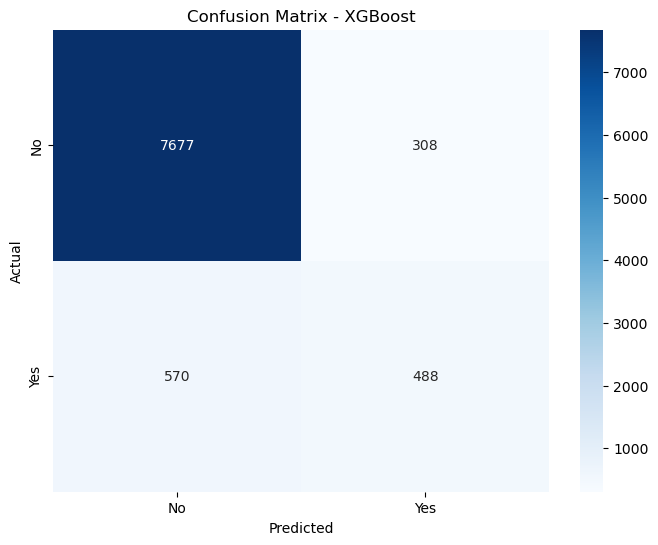

In [70]:
# Generate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [71]:
# The model performs well in predicting non-responders but struggles with capturing all positive cases (as seen by the false negatives).
# If the marketing goal would be to minimize missed potential customers, 
# further tuning of the model (such as balancing precision and recall or adjusting the decision threshold) could enhance performance.
# Evaluating this confusion matrix alongside precision, recall, and F1-score will help in determining the overall effectiveness of the model.

In [72]:
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7985
           1       0.61      0.46      0.53      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.71      0.74      9043
weighted avg       0.89      0.90      0.90      9043



In [73]:
# - The model seems to be highly effective at predicting non-responders but struggles with correctly identifying customers 
#   who would respond positively.
# - The low recall for class 1 suggests potential lost opportunities for detecting customers who could say yes.
# - To improve future marketing outcomes, future improvements could include:
# ----> Handling class imbalance (for example using SMOTE, undersampling (mentioned earlier), or class weights).
# ----> Tuning the decision threshold to improve recall for positive cases.

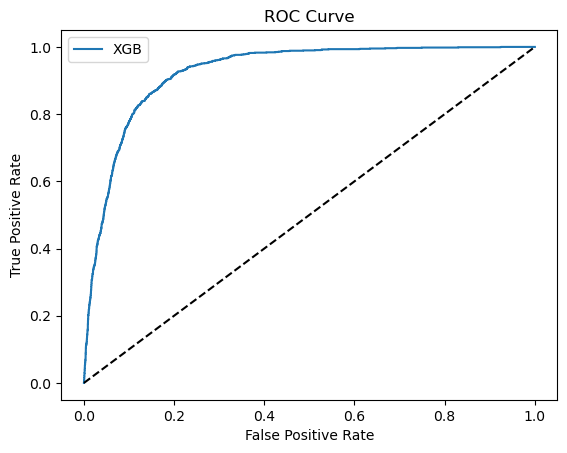

In [74]:
y_probs = xgb_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label='XGB')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [75]:
# The model genrally demonstrates strong discriminatory power.

In [ ]:
# Conclusion

# In this project, I developed and evaluated four machine learning classifiers—Logistic Regression, 
# Decision Tree, Random Forest, and XGBoost—to predict whether a bank customer would subscribe to a 
# term deposit. After preprocessing, including handling missing values, encoding 
# categorical variables, and scaling numerical features, the models were trained and compared using 
# accuracy, precision, recall, and AUC-ROC scores.
#
# Among the models, XGBoost emerged as the most effective classifier. Its performance can be attributed to its ability to handle complex 
# feature interactions, imbalanced classes, and its built-in regularization to minimize overfitting. 
# Random Forest also performed well, probobaly becouse it offers robust generalization (If the dataset is imbalanced, 
# Random Forest can handle this using built-in techniques like class weighting.), while Logistic Regression and 
# Decision Tree models were less effective due to their limitations in handling non-linear and complex relationships.

# Future improvements
#
# - Handling Imbalanced Data: Although XGBoost handled the imbalance well, 
#   using techniques such as SMOTE or undersampling could further enhance predictions.
#
# - Hyperparameter Tuning: While basic tuning was performed, an extensive grid or random search could improve model optimization.
#
# - Feature Engineering: Additional feature extraction, such as interaction terms or aggregating historical data, could further improve model performance.
